# I. Sampling of Analog Signals

## I.1 Signals

A **signal** is a measurable quantity which varies in time, space or some other variable.

Examples:
- a voltage which varies in time (1D voltage signal)
- sound pressure which varies in time (sound signal)
- intensity of light which varies across a photo (2D image)

Signals are usually represented as mathematical functions, e.g. $v(t)$.

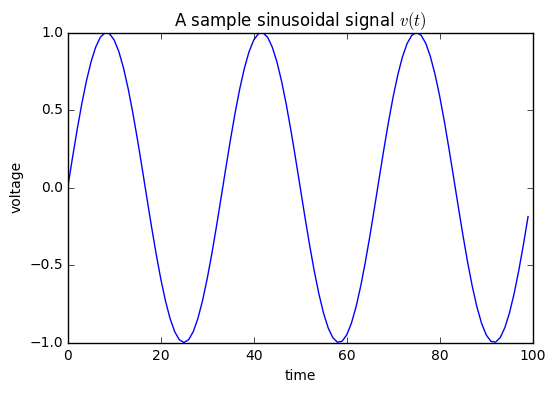

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np, math
t = np.arange(0,100)                 # this means 0,1,2,...100
v = np.sin(2*math.pi*0.03*t)         # sin(2*pi*f*t)
plt.plot(t,v)                        # plotting
plt.xlabel('time')
plt.ylabel('voltage')
plt.title('A sample sinusoidal signal $v(t)$')


### Unidimensional and multidimensional signals

An **unidimensional** (1D) signal is a function of a single variable. Example: a voltage signal $v(t)$ only varies in time.

A **multidimensional** (2D, 3D ... M-D) signal is a function of a multiple variables. Example: intensity of a grayscale image $I(x,y)$ across the surface of a photo.

In these lectures we consider only 1D signals. However, the techniques which you will learn for 1D signals can also be used for multidimensional signals (usually 2D signals, images).


### Analog and discrete signals

**Analog** signals are functions of continuous variables, and there exists a signal value for any value of the variable within the defined range.

**Discrete** signals are functions of discrete variables. These signals have values only at certain discrete values, typically indexed with integer numbers ($x[-1]$, $x[0]$, $x[1]$...)

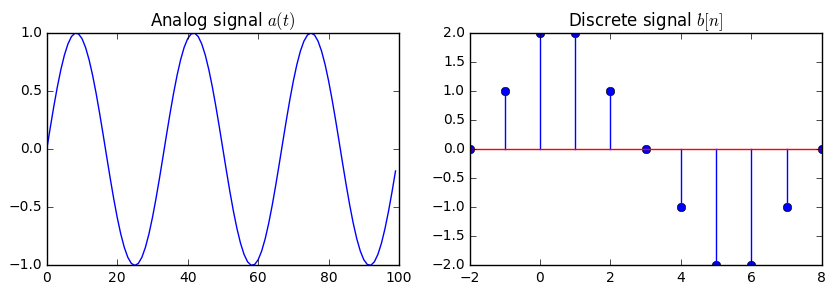

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np, math
tanalog = np.arange(0,100)                 # this means 0,1,2,...100
vanalog = np.sin(2*math.pi*0.03*tanalog)         # sin(2*pi*f*t)
tdiscrete = np.arange(-2, 9)
vdiscrete = np.array([0, 1, 2, 2, 1, 0, -1, -2, -2, -1, 0]) 
plt.figure(figsize=(10, 3));
plt.subplot(121)
plt.plot(tanalog,vanalog); plt.title('Analog signal $a(t)$')
plt.subplot(122)
plt.stem(tdiscrete,vdiscrete); plt.title ('Discrete signal $b[n]$')

The values of a discrete signal are usually called **samples**. Usually, discrete signals have uniform spacing between the samples.

**Note:** A discrete signal has **no value defined** in the space between samples. In these areas, it simply does not exist.

Discrete signals are usually obtained by **sampling** analog signals.

#### Notation

Throughout these lectures, an analog signal is written with **curly braces**, and the variable is typically denoted with $t$ (from _time_), e.g. $a(t)$. 

A discrete signal is written with **square brackets**, and the variable is typically denoted with $n$, or sometimes $k$. The letters _n_ and _k_ are typically used to designate natural numbers, and therefore they suggest the discrete nature of the signal.

Examples: $a(1)$ and $a(3.23542)$ are the values of signal $a(t)$ at time $t=2$ and $t=3.23542$, whereas $b[-1]$ and $b[2]$ are the values of $b[n]$ at discrete time $n=-1$ and $n=2$. Note that $x[1.3]$ is incorrect, because the signal $x[n]$ is only defined for integer values of $n$.

### Signals with continuous and discrete values

Besides the variable of the signal, the value of the signal can also be continuous or discrete.

A signal with continuous values can have any value in a certain defined range. For example, the voltage signal in one point in a usual electronic circuit can take any value between, for example, 0V and 5V.

A signal with discrete values can only have a value from a discrete set of possible values. For example, the number of bits received in a second over a binary communication channel can only be a natural number. 

## I.2 Discrete and analog frequency

A signal is called **periodic** if its values repeat themselves after a certain time (known as **period**).

For an analog signal:
$$x(t) = x(t+T), \forall t$$

For a discrete signal:
$$y[n] = y[n + N]), \forall t$$

The **fundamental period** of a signal is the minimum value of $T$ or $N$. Note that multiples of $T$ or $N$ are also periods ($2T$, $3T$ etc), but we are usually interested only in the fundamental period. Therefore, from now on, by  _period_ we will mean the fundamental period.

Note that for analog signals the period has unit _seconds_, but for digital signals the period is _adimensional_. This is because $T$ is time, but $N$ is just a number and therefore it does not have a unit attached.

The frequency of a signal is defined as the inverse of the period.

For analog signals:
$$F = \frac{1}{T},$$
and the unit is:
$$[F] = \frac{1}{s} = Hz.$$

For discrete signals:
$$f = \frac{1}{N},$$
and it has no unit, since $N$ has no unit also.

We will frequencies of analog signals with $F$ and frequencies of discrete signals with $f$.

Thus, we can say that an analog signal has a frequency of $F = 0.1 Hz$, but a discrete signal has a frequency of $f = 0.1$.

### Pulsation

For harmonic signals, the pulsation is defined as $\omega = 2 \pi f$ for both analog and discrete signals. 

We use $\omega$ when treating harmonic signals like _cos()_ or _sin()_, e.g. $cos(\omega t) = cos(2 \pi f t)$.

### Domain of existence

For analog signals, the period can be as small as desired, $T \to 0$, and therefore the frequency can be very large, $F_{max} = \infty$.

**For discrete signals, the smallest period is $N = 2$** (excluding N=1 which designates a constant signal). Therefore, the largest possible frequency is $f_{max} = \frac{1}{2}$.

Due to mathematical reasons (rememeber SCS class from last year), we will consider negative frequencies as well, mirroring the positive frequencies.

Therefore, the domain of existence for frequencies of analog signals ("analog frequencies") is:
$$F \in (-\infty, \infty),$$
whereas for frequencies of discrete signals ("discrete frequencies") it is:
$$f \in [-\frac{1}{2}, \frac{1}{2}].$$

## I.3 Sampling of analog signals

Discrete signals are usually obtained from analog signals through the process of **sampling**.

Sampling means taking the values from the analog signal at certain discrete moments of time (usually periodic).

The time between two samples is the **sampling period $T_s$**. The corresponding frequency is the **sampling frequency $F_s = \frac{1}{T_s}$**.

[ 0  8 16 24 32 40 48 56 64 72 80 88 96]


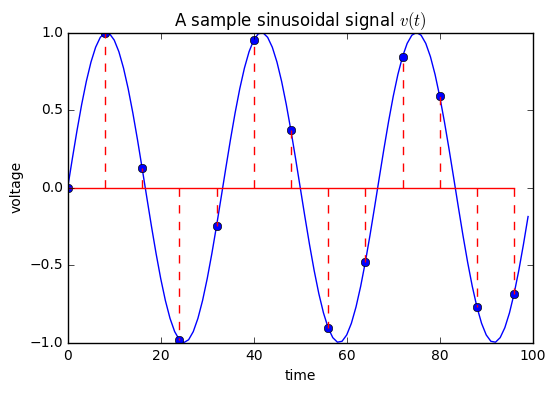

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np, math
t = np.arange(0,100)                 # 
xa = np.sin(2*math.pi*0.03*t)        # analog signal
Ts = 8                               # Sampling period Ts=10, sampling freq Fs = 0.1
td = t[0:101:Ts]                     # go from 0 to 100 with step=Ts, i.e. 0,10,20,...
xd = xa[td]
print td
plt.plot(t,xa)                        # plotting
plt.stem(td,xd,'--r')
plt.xlabel('time')
plt.ylabel('voltage')
plt.title('A sample sinusoidal signal $v(t)$')

### Sampling equation

The process of sampling can be described by the following equation:
$$x[n] = x_a(n \cdot Ts).$$

The $n$-th value in the discrete signal x[n] is the value of the analog signal taken after $n$ sampling periods, at time $t = n T_s$.

### Sampling of harmonic signals

Consider a cosine signal $x_a(t) = cos (2 \pi F t)$, sampled with sampling frequency Fs. What is the resulting discrete signal $x[n]$?

Applying the sampling equation above, we obtain:
$$x[n] = x_a(n \cdot T_s) = x_a(n \cdot \frac{1}{F_s}) = cos(2 \pi F n \frac{1}{Fs}) \\ = cos(2 \pi \frac{F}{Fs} n) = cos(2 \pi f n),$$
where 
$$f = \frac{F}{F_s}.$$

Sampling an analog cosine/sine produces a discrete cosine/sine of similar form, but with discrete frequency $f = \frac{F}{F_s}$.

#### Example
Sampling an 100Hz analog cosine signal $x_a(t) = cos (2 \pi 100 t)$ with a sampling frequency $F_s = 300Hz$ produces a discrete signal $x[n] = cos (2 \pi \frac{1}{3} t)$. The discrete frequency is $f = \frac{1}{3}$

Sampling the same signal with higher sampling frequency $F_s = 500Hz$ produces a different signal, with a different frequency: $x[n] = cos (2 \pi \frac{1}{5} t)$.

Explain: why does sampling with a higher sampling frequency produce a signal with lower discrete frequency?

Note that in both cases the frequency is smaller than $f_{max} = \frac{1}{2}$

**Note:** A discrete sinusoidal signal might not _look_ sinosoidal, when its frequency is high (close to $\frac{1}{2}$).

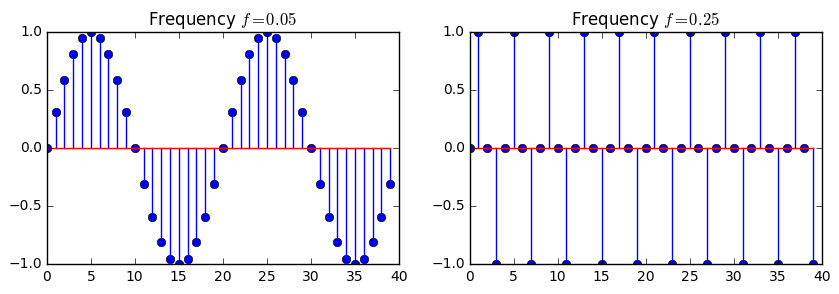

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np, math
t = np.arange(0,40)                  #
x1 = np.sin(2*math.pi*0.05*t)         #  frequency 
x2 = np.sin(2*math.pi*0.25*t)          # sin(2*pi*f*t)
plt.figure(figsize=(10, 3));
plt.subplot(121)
plt.stem(t,x1); plt.title('Frequency $f = 0.05$')
plt.subplot(122)
plt.stem(t,x2); plt.title ('Frequency $f = 0.25$')

### Sampling theorem

**The Nyquist-Shannon sampling theorem:**

If a signal that has maximum frequency $F_{max}$ is sampled with a a sampling frequency $F_s \ge 2F_{max}$, then it can be perfectly reconstructed from its samples using the formula:
$$x_a(t) = \sum_{n=-\infty}^{+\infty} x[n] \cdot \frac{sin(\pi (F_s t - n))}{\pi (F_s t - n)}.$$

**Comments**
* All the information in the original signal is contained in the samples, provided that they are sampled correctly
* We can process discrete samples instead of the original analog signals
* Sampling with $F_s \ge 2F_{max}$ ensures that the resulting discrete frequencies are smaller than $f = \frac{F}{F_s} \leq \frac{F_{max}}{F_s} \leq \frac{1}{2}$

### Aliasing

What happens when the sampling frequency is not high enough? The resulting discrete frequency is higher than $\frac{1}{2}$ and becomes **identical** to a frequency smaller than $\frac{1}{2}$.

This phenomenon is known as **aliasing**.

**Example**. Signal $x_a(t) = cos(2 \pi 10 t)$ is sampled with $F_s = 15 Hz$. According to the sampling equation, the result is:
$$x[n] = cos (2 \pi \frac{10}{15} n) = cos (2 \pi \frac{2}{3} n).$$

But, the frequency $\frac{2}{3}$ is actually identical to $\frac{1}{3}$:

$$cos (2 \pi \frac{2}{3} n) = cos (2 \pi \frac{1}{3} n).$$

Proof: since cos() is periodical, we can subtract a multiple $2 \pi$:

$$cos (2 \pi \frac{2}{3} n) = cos (2 \pi \frac{2}{3} n - 2 \pi n) = cos (2 \pi (\frac{2}{3} - 1) n) \\ = cos (- 2 \pi \frac{1}{3} n ) = cos (2 \pi \frac{1}{3} n )$$

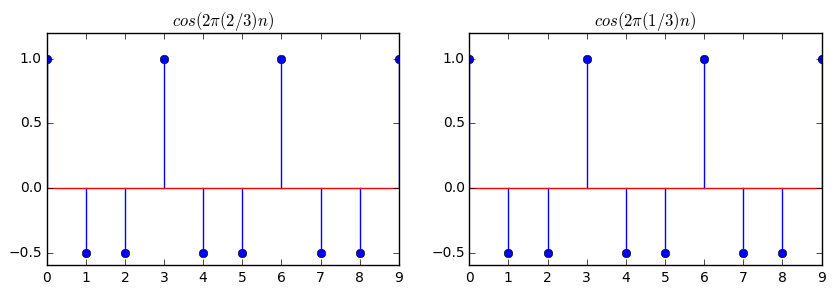

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np, math
n = np.arange(0,10)              
x1 = np.cos(2*math.pi*(2/3.0)*n)    # frequency = 2/3
x2 = np.cos(2*math.pi*(1/3.0)*n)    # frequency = 1/3
plt.figure(figsize=(10, 3));
plt.subplot(121)
plt.stem(n, x1); plt.title('$cos(2 \pi (2/3) n)$')
plt.subplot(122)
plt.stem(n, x2); plt.title('$cos(2 \pi (1/3) n)$')

### Aliasing

http://www.dictionary.com/browse/alias:

"alias": _a false name used to conceal one's identity; an assumed name_

**Rule**: every discrete frequency that exceeds $f_{max} = \frac{1}{2}$ is equivalent (an **alias**) to a frequency that is lower than $f_{max} = \frac{1}{2}$:
$$cos (2 \pi (\frac{1}{2} + \epsilon)n) = cos (2 \pi (\frac{1}{2} - \epsilon)n)$$
$$sin (2 \pi (\frac{1}{2} + \epsilon)n) = - sin (2 \pi (\frac{1}{2} - \epsilon)n)$$

Every frequency $f \in \mathbb{R}$ is actually identical to a frequency in the interval $f \in [-\frac{1}{2}, \frac{1}{2}]$, up to a minus sign (for _sin()_). Therefore it makes no sense to consider frequencies outside of this interval.

Aliasing is only valid for discrete frequencies, not analog!

### What's the problem with aliasing?

Problem: sampling different analog signals, with different frequencies, will lead to exactly the same samples. How can be know from what signal did the samples come from? It is impossible.

**Note:** Always, there is only a single analog frequency $F \in [-\frac{Fs}{2}, \frac{Fs}{2}]$ that corresponds to the samples. For every discrete frequencies $f \in [-\frac{1}{2}, \frac{1}{2}]$ there exists a single correponding analog frequencies $F \in [-\frac{Fs}{2}, \frac{Fs}{2}]$, so for these there is no confusion. Confusion can appear only for analog frequencies higher than $\frac{F_s}{2}$, which are not sampled according to the sampling theorem.

**Example** If sampling frequency is $F_s = 15Hz$, all the following signals $cos(2 \pi 5 t)$, $cos(2 \pi 10 t)$, $cos(2 \pi 20 t)$, $cos(2 \pi 30 t)$ will produce the same samples.

**Exercise**: which are the next signals in the above sequence, which produce the same samples?

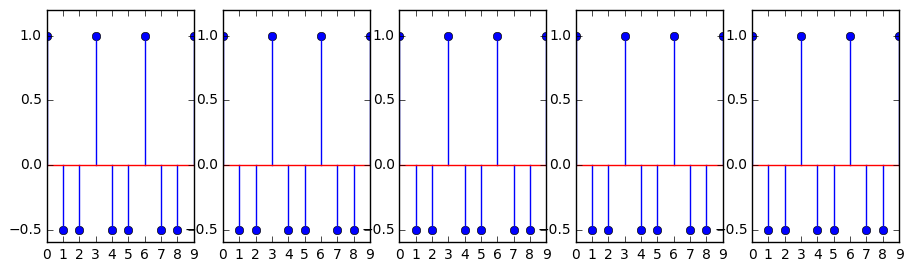

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np, math
n = np.arange(0,10)              
plt.figure(figsize=(11, 3));
plt.subplot(151); plt.stem(n, np.cos(2*math.pi*(1/3.0)*n)); 
plt.subplot(152); plt.stem(n, np.cos(2*math.pi*(2/3.0)*n)); 
plt.subplot(153); plt.stem(n, np.cos(2*math.pi*(4/3.0)*n)); 
plt.subplot(154); plt.stem(n, np.cos(2*math.pi*(5/3.0)*n)); 
plt.subplot(155); plt.stem(n, np.cos(2*math.pi*(7/3.0)*n)); 

### Exercise

What signals can produce the following samples:

[0, 9, -0.2, 1.2]

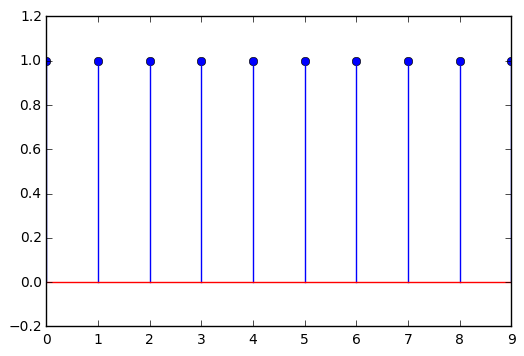

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np, math
n = np.arange(0,10)              
plt.stem(n, np.ones(10)); 
plt.axis([0,9,-0.2,1.2])

### Ideal reconstruction of analog signals from samples

A discrete frequency $f \in [-\frac{1}{2}, \frac{1}{2}] $ will be reconstructed with the following equation:
$$x_r(t) = x[\frac{t}{T_s}] = x[t \cdot F_s].$$

For a discrete frequency outside this interval, the reconstruction uses the same equation, but the frequency $f$ will be replaced with the equivalent frequency from the interval $[-\frac{1}{2}, \frac{1}{2}] $.

As a consequence, **reconstruction leads only to analog signals with frequencies $F \in [-\frac{Fs}{2}, \frac{Fs}{2}]$**. 

Analog signals which were sampled according to the condition in the sampling theorem ($F_s \geq 2 F$, $F \leq \frac{F_s}{2}$) will be reconstructed identically.

Analog signals which were not sampled accordingly will not be reconstructed identically. The reconstructed frequency will be the corresponding frequency from the base interval $[-\frac{Fs}{2}, \frac{Fs}{2}]$

### Anti-alias filtering

If a signal has frequencies $F > \frac{F_s}{2}$, it is better to eliminate these frequencies from the signal before sampling. If they are left, the samples will just overlap with the samples of the corresponding frequency from the base interval $[-\frac{Fs}{2}, \frac{Fs}{2}]$ and will create confusion.

An **anti-alias filter** is an analog low-pass filter usually situated before a sampling circuit, designed to reject all frequencies $F > \frac{F_s}{2}$ from the signal before sampling.

They are typically integrated in hardware systems designed for audio processing or similar tasks.

## I.4 Signal quantization and coding

After sampling a real-valued analog signal, the samples can have any real value. **Quantization** is the process of truncating a value to a limited set of predefined values (**quantization levels**).

A rigurous presentation is outside the scope of these lectures. We only give some illustrative examples.

For example, the grade of a student can be any real value between 0 and 10 (say, 8.75). Due to administrative reasons, the value needs to be truncated to one of the integer numbers 1, 2... 10. This is quantization of the value, and the quantization levels are the possible integer grades.

Another example: we sample an analog voltage signal with possible values between 0V and 10V. We need to store the value on one byte (8 bits). With 8 bits we have $2^8 = 256$ different possible values, which can go from 0 to 10. Therefore we divide the interval $[0-10]$ in 255 equal sub-intervals of size $\frac{10}{255} \approx 0.039V$, so that we have 256 quantization levels, corresponding to the 256 possible numeric values: $0 = 0V$, $1 \approx 0.039V$, $2 \approx 0.078V$, ...$256 = 10V$. The values of the samples are rounded to the closest quantization level.

The difference between quantized value and the original value is the **quantization error**. 

Quantization can be done via **truncating** (the chosen cuantization level is the one immediately smaller than the value) or via **rounding** (the chosen cuantization level is the closest to the value, either smaller or larger). Truncating is simpler, but rounding is usually preferred because of smaller quantization errors.

**Coding** is the process of converting a quantized value in binary form, such that it is usable by the processor or microcontroller in a digital system.

## I.5 A/D and D/A Conversion

Typically, the whole process of sampling, quantization and coding is done by a single circuit known as **Analog to Digital Converter (ADC)**.

The inverse operation of reconstructing an analog signal from numeric samples is done by a **Digital to Analig Converter (DAC)** circuit. Usually reconstruction is not done based on the ideal reconstruction equation presented above, which is too compex, but with simpler empiric approach.

